# ML classification Assignment

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.

3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1.A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.
Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important.

Problem 3:
Which algorithms are best for this dataset

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [60]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [61]:
print(df['marital.status'].unique())
print(df['workclass'].unique())
print(df['sex'].unique())
print(df['race'].unique())
print(df['occupation'].unique())
print(df['native.country'].unique())

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['Female' 'Male']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand'

first removing all the rows with question marks!...along with that converting the targrt column categorical to numeric.

In [62]:
#Dropping Unecessary columns like native.country ,education,ocupation,race


In [64]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [65]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [66]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [67]:
unecessary_cols = ['native.country','education','occupation','sex','race']

In [68]:
df.drop(unecessary_cols,axis =1,inplace = True)

In [69]:
df

,age,workclass,fnlwgt,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,income
0,90,?,77053,9,Widowed,Not-in-family,0,4356,40,0
1,82,Private,132870,9,Widowed,Not-in-family,0,4356,18,0
2,66,?,186061,10,Widowed,Unmarried,0,4356,40,0
3,54,Private,140359,4,Divorced,Unmarried,0,3900,40,0
4,41,Private,264663,10,Separated,Own-child,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Not-in-family,0,0,40,0
32557,27,Private,257302,12,Married-civ-spouse,Wife,0,0,38,0
32558,40,Private,154374,9,Married-civ-spouse,Husband,0,0,40,1
32559,58,Private,151910,9,Widowed,Unmarried,0,0,40,0


###### first removing all the rows with question marks!  by converting them to NaN values then dropping those NaN values.

In [70]:
df['workclass'] = df['workclass'][df['workclass'] != '?']

In [71]:
df

,age,workclass,fnlwgt,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,77053,9,Widowed,Not-in-family,0,4356,40,0
1,82,Private,132870,9,Widowed,Not-in-family,0,4356,18,0
2,66,NaN,186061,10,Widowed,Unmarried,0,4356,40,0
3,54,Private,140359,4,Divorced,Unmarried,0,3900,40,0
4,41,Private,264663,10,Separated,Own-child,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Not-in-family,0,0,40,0
32557,27,Private,257302,12,Married-civ-spouse,Wife,0,0,38,0
32558,40,Private,154374,9,Married-civ-spouse,Husband,0,0,40,1
32559,58,Private,151910,9,Widowed,Unmarried,0,0,40,0


In [72]:
df = df.dropna()

In [73]:
df

,age,workclass,fnlwgt,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,9,Widowed,Not-in-family,0,4356,18,0
3,54,Private,140359,4,Divorced,Unmarried,0,3900,40,0
4,41,Private,264663,10,Separated,Own-child,0,3900,40,0
5,34,Private,216864,9,Divorced,Unmarried,0,3770,45,0
6,38,Private,150601,6,Separated,Unmarried,0,3770,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Not-in-family,0,0,40,0
32557,27,Private,257302,12,Married-civ-spouse,Wife,0,0,38,0
32558,40,Private,154374,9,Married-civ-spouse,Husband,0,0,40,1
32559,58,Private,151910,9,Widowed,Unmarried,0,0,40,0


In [74]:
df.drop('fnlwgt',axis = 1,inplace = True)

C:\Users\lahari\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
df

,age,workclass,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Widowed,Not-in-family,0,4356,18,0
3,54,Private,4,Divorced,Unmarried,0,3900,40,0
4,41,Private,10,Separated,Own-child,0,3900,40,0
5,34,Private,9,Divorced,Unmarried,0,3770,45,0
6,38,Private,6,Separated,Unmarried,0,3770,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Not-in-family,0,0,40,0
32557,27,Private,12,Married-civ-spouse,Wife,0,0,38,0
32558,40,Private,9,Married-civ-spouse,Husband,0,0,40,1
32559,58,Private,9,Widowed,Unmarried,0,0,40,0


In [76]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [77]:
df['marital.status']=df['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single',
                                               'Never-married':'Single', 'Separated':'Single', 'Widowed':'Single', 
                                               'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

C:\Users\lahari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df

,age,workclass,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Single,Not-in-family,0,4356,18,0
3,54,Private,4,Single,Unmarried,0,3900,40,0
4,41,Private,10,Single,Own-child,0,3900,40,0
5,34,Private,9,Single,Unmarried,0,3770,45,0
6,38,Private,6,Single,Unmarried,0,3770,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Single,Not-in-family,0,0,40,0
32557,27,Private,12,Married,Wife,0,0,38,0
32558,40,Private,9,Married,Husband,0,0,40,1
32559,58,Private,9,Single,Unmarried,0,0,40,0


In [79]:
df.drop('relationship',axis = 1,inplace = True)

C:\Users\lahari\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
df.head()

,age,workclass,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Single,0,4356,18,0
3,54,Private,4,Single,0,3900,40,0
4,41,Private,10,Single,0,3900,40,0
5,34,Private,9,Single,0,3770,45,0
6,38,Private,6,Single,0,3770,40,0


In [81]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [82]:
df['workclass']=df['workclass'].map({'Private':1, 'State-gov':2,
                                               'Federal-gov':3, 'Self-emp-not-inc':4, 'Self-emp-inc':5, 
                                               'Local-gov':6, 'Without-pay':7 , 'Never-worked' : 8})

C:\Users\lahari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
df

,age,workclass,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
1,82,1,9,Single,0,4356,18,0
3,54,1,4,Single,0,3900,40,0
4,41,1,10,Single,0,3900,40,0
5,34,1,9,Single,0,3770,45,0
6,38,1,6,Single,0,3770,40,0
...,...,...,...,...,...,...,...,...
32556,22,1,10,Single,0,0,40,0
32557,27,1,12,Married,0,0,38,0
32558,40,1,9,Married,0,0,40,1
32559,58,1,9,Single,0,0,40,0


In [84]:
df['marital.status'].unique()

array(['Single', 'Married'], dtype=object)

In [85]:
df['marital.status'] = df['marital.status'].map({'Single' : 0,'Married' :1})

C:\Users\lahari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df

,age,workclass,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
1,82,1,9,0,0,4356,18,0
3,54,1,4,0,0,3900,40,0
4,41,1,10,0,0,3900,40,0
5,34,1,9,0,0,3770,45,0
6,38,1,6,0,0,3770,40,0
...,...,...,...,...,...,...,...,...
32556,22,1,10,0,0,0,40,0
32557,27,1,12,1,0,0,38,0
32558,40,1,9,1,0,0,40,1
32559,58,1,9,0,0,0,40,0


This is a classisification problem.
lets have a look at the pairplot and heat map too.

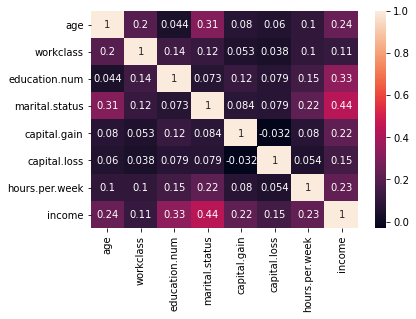

In [87]:
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\lahari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lahari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lahari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lahari\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


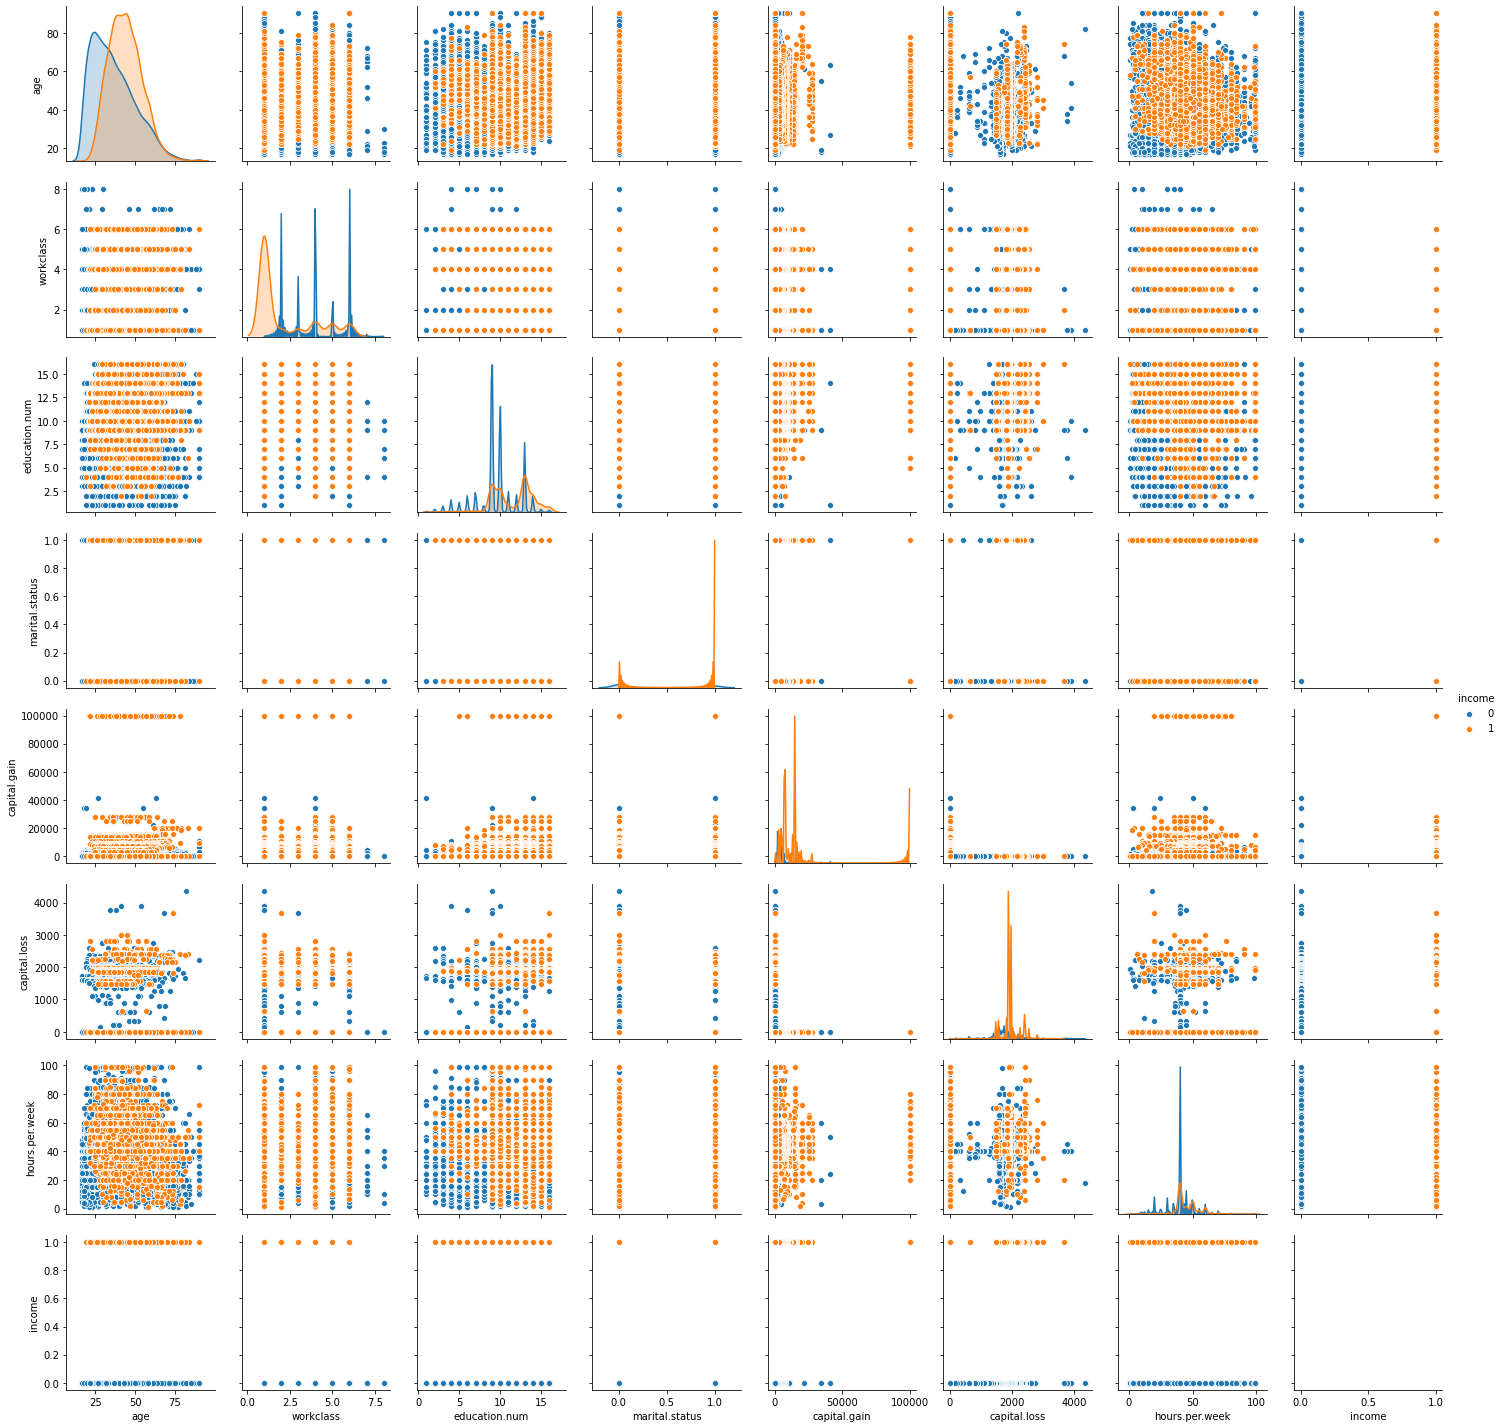

In [88]:
sns.pairplot(df,hue ='income' )

Here we can't use logistic regression because data is not at all linearly seperable..
So, going with Random Forest, XGBoost ,KNN...Let's see which one will perform better!!

In [89]:
X = df.drop('income',axis = 1)
y = df.income

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [91]:
names = ["Nearest_Neighbors", "Random_Forest","XGBoost"]

classifiers = [KNeighborsClassifier(3), RandomForestClassifier(max_depth=5, n_estimators=100),XGBClassifier()]

In [92]:
scores = []
for name , clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)

In [93]:
scores

[0.8305128872689403, 0.8545951575110649, 0.8621452746680552]

##### Clearly XGBoost wins the Game!!!  which is the better algorithm for this dataset.

In [104]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
cv_res=cross_val_score(XGB,X_train,y_train,cv=10)
print(cv_res.mean()*100)

85.91753416623915


It didnt got improved with any crossvalidation...